# Logistic Regression

### Importing the libraries and loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv', sep=',')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Preprocessing 

#### Look for undesired NaN value

In [4]:
data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

#### Drop the unwanted column which usually don't contribution in the event

In [5]:
data.drop(['name','ticket','cabin','boat','body','home.dest'], axis=1, inplace =True)

In [6]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


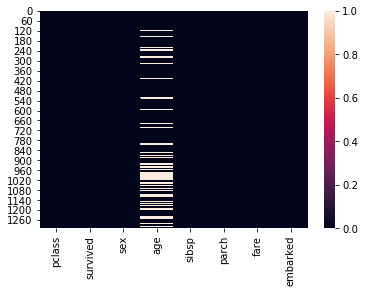

In [7]:
sns.heatmap(data.isnull())

#### Filling the age column with simple logic with Passenger class Pclass

In [9]:
def age_filler(x):
    age = x[0]
    pclass = x[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age
    
data['age'] = data[['age','pclass']].apply(age_filler,axis=1)
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,C


#### Processing catergorical data by assigning value which can be understood by machines

In [10]:
Sex = pd.get_dummies(data['sex'], drop_first =True)
Embark =pd.get_dummies(data['embarked'],drop_first =True)
data = pd.concat([data,Sex,Embark],axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,male,Q,S
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S,0,0,1
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S,1,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S,0,0,1
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S,1,0,1
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S,0,0,1


In [11]:
data.drop(['sex','embarked'],axis=1, inplace =True)
data.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1


#### Looking for any NaN value

In [12]:
np.any(np.isnan(data))

True

#### Computing the total NaN value on each columns

In [13]:
data.isnull().sum()

pclass      1
survived    1
age         0
sibsp       1
parch       1
fare        2
male        0
Q           0
S           0
dtype: int64

#### Trying not to collapse the information and filling NaN 

In [14]:
data['fare'].fillna(method='ffill', inplace = True)
data.isnull().sum()

pclass      1
survived    1
age         0
sibsp       1
parch       1
fare        0
male        0
Q           0
S           0
dtype: int64

In [15]:
data.dropna(axis=0, inplace =True)

In [16]:
data.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
male        0
Q           0
S           0
dtype: int64

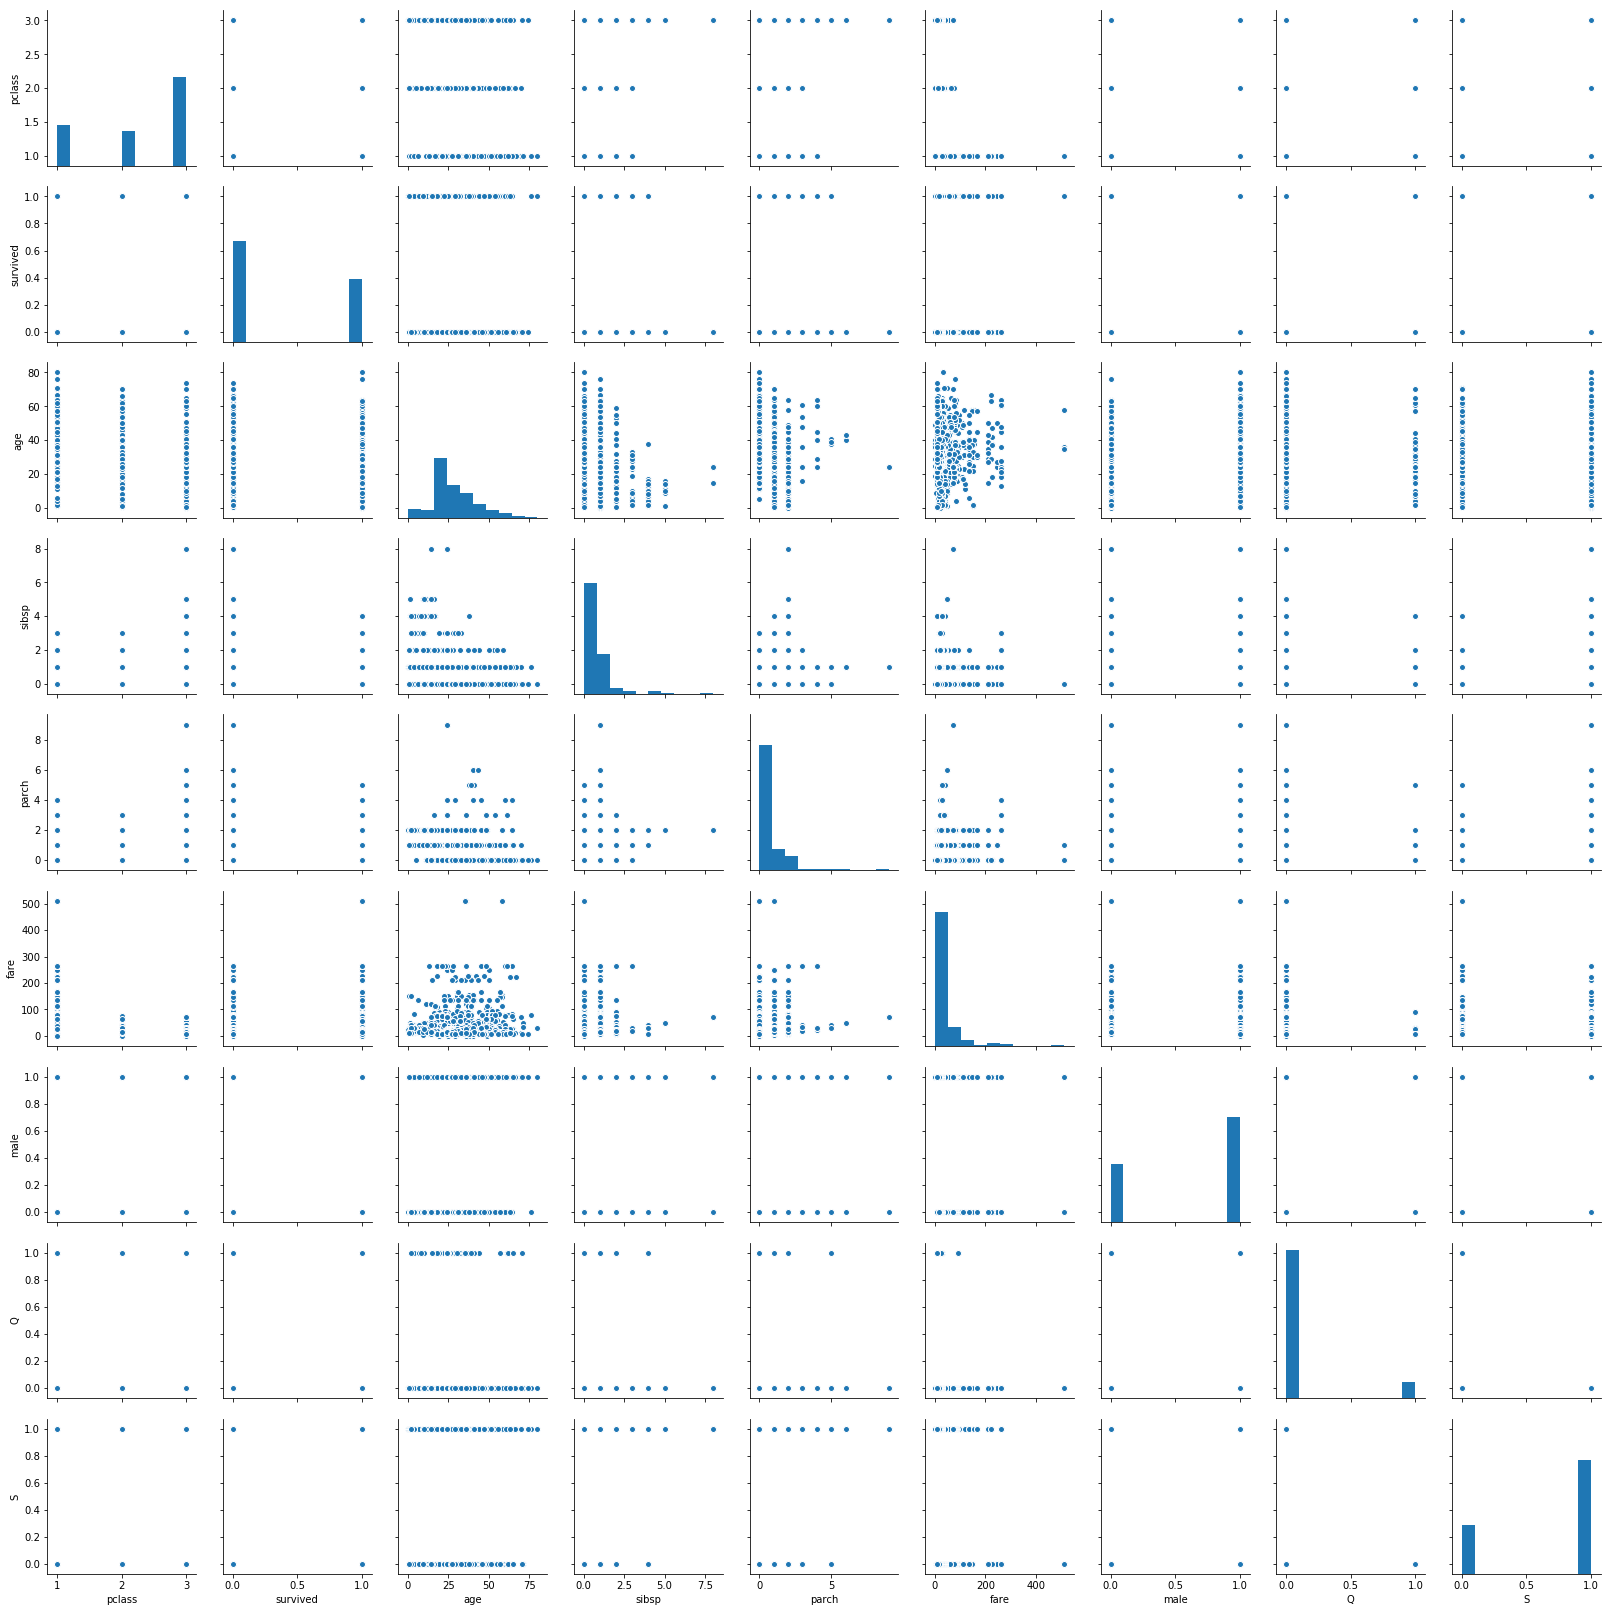

In [17]:
sns.pairplot(data)

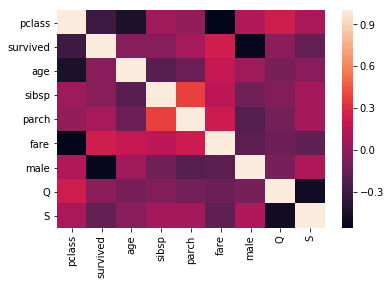

In [18]:
sns.heatmap(data.corr())

#### Assigning the values to X and y

In [19]:
X = data.drop('survived',axis=1)
y =data['survived']

#### Train and test data splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =100,test_size =0.3)

#### Training the model

In [21]:
Log_model = LogisticRegression()

In [22]:
Log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Computing the predictions

In [23]:
prediction = Log_model.predict(X_test)

#### Evaluating the model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))

             precision    recall  f1-score   support

        0.0       0.80      0.84      0.82       253
        1.0       0.68      0.63      0.65       140

avg / total       0.76      0.76      0.76       393

[[212  41]
 [ 52  88]]
